In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import cv2
import yaml
import warnings
import sys
from ultralytics import YOLO
from pathlib import Path
warnings.filterwarnings('ignore')

try:
    import google.colab
    IN_COLAB = True
except ImportError:
    IN_COLAB = False

# 환경에 따라 PROJECT_ROOT 설정
if IN_COLAB:
    PROJECT_ROOT = Path("/content/drive/MyDrive/likelion/PCB")
else:
    PROJECT_ROOT = Path.cwd().parent

# sys.path 추가 (import용)
if str(PROJECT_ROOT) not in sys.path:
    sys.path.insert(0, str(PROJECT_ROOT))

# 작업 디렉토리 변경 (파일 접근용) - 중요!
os.chdir(PROJECT_ROOT)

print(f"Environment: {'Colab' if IN_COLAB else 'Local'}")
print(f"PROJECT_ROOT: {PROJECT_ROOT}")
print(f"Current working directory: {os.getcwd()}")

Environment: Local
PROJECT_ROOT: /Users/mungughyeon/Library/CloudStorage/GoogleDrive-moonstalker9010@gmail.com/내 드라이브/likelion/PCB
Current working directory: /Users/mungughyeon/Library/CloudStorage/GoogleDrive-moonstalker9010@gmail.com/내 드라이브/likelion/PCB


In [2]:
from src.data.augmentation import AugmentPipeline, create_pipeline
from src.utils.config import load_config
from IPython.display import display
import random

config_path = "configs/config.yaml"
image_dir = "dataset/roboflow/train/images"

config = load_config(config_path)
pipeline = create_pipeline(
    config_path=config_path,
    img_size=640,
    mode='train'
)

2026-01-14 13:19:30 - INFO - Using device: mps
2026-01-14 13:19:30 - INFO - Loaded config from configs/config.yaml
2026-01-14 13:19:30 - INFO - Augmentation enabled: True
2026-01-14 13:19:30 - INFO - PCB optimized: True
2026-01-14 13:19:30 - INFO - Created training augmentation pipeline


In [3]:
def visualize_augment(image_dir: str, pipeline, n_samples: int = 3):
    try:
        # 이미지 파일 목록 로드
        image_files = [
            os.path.join(image_dir, f)
            for f in os.listdir(image_dir)
            if f.endswith((".jpg", ".jpeg", ".png"))
        ]

        if not image_files:
            raise FileNotFoundError(
                f"'{image_dir}' 폴더에 이미지 파일이 없습니다."
            )

        # 요청한 개수만큼 랜덤 샘플링
        sampled_images = random.sample(
            image_files,
            min(n_samples, len(image_files))
        )

        # 샘플 수만큼 행 생성 (각 행: 원본 | 증강)
        fig, axes = plt.subplots(
            len(sampled_images), 2,
            figsize=(14, 7 * len(sampled_images))
        )

        # 단일 샘플일 때 인덱싱 통일
        if len(sampled_images) == 1:
            axes = [axes]

        for idx, sample_image_path in enumerate(sampled_images):
            # 이미지 로드 (BGR → RGB)
            image = cv2.imread(sample_image_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

            # 증강 파이프라인 적용
            augmented_data = pipeline(
                image=image,
                bboxes=[],
                class_labels=[]
            )
            augmented_image = augmented_data["image"]

            # 원본 이미지
            axes[idx][0].imshow(image)
            axes[idx][0].set_title("Original Image")
            axes[idx][0].axis("off")

            # 증강 이미지
            axes[idx][1].imshow(augmented_image)
            axes[idx][1].set_title("Augmented Image")
            axes[idx][1].axis("off")

        plt.tight_layout()
        plt.show()

    except Exception as e:
        raise RuntimeError(
            "이미지 로드 또는 증강 시각화 과정에서 문제가 발생했습니다."
        ) from e

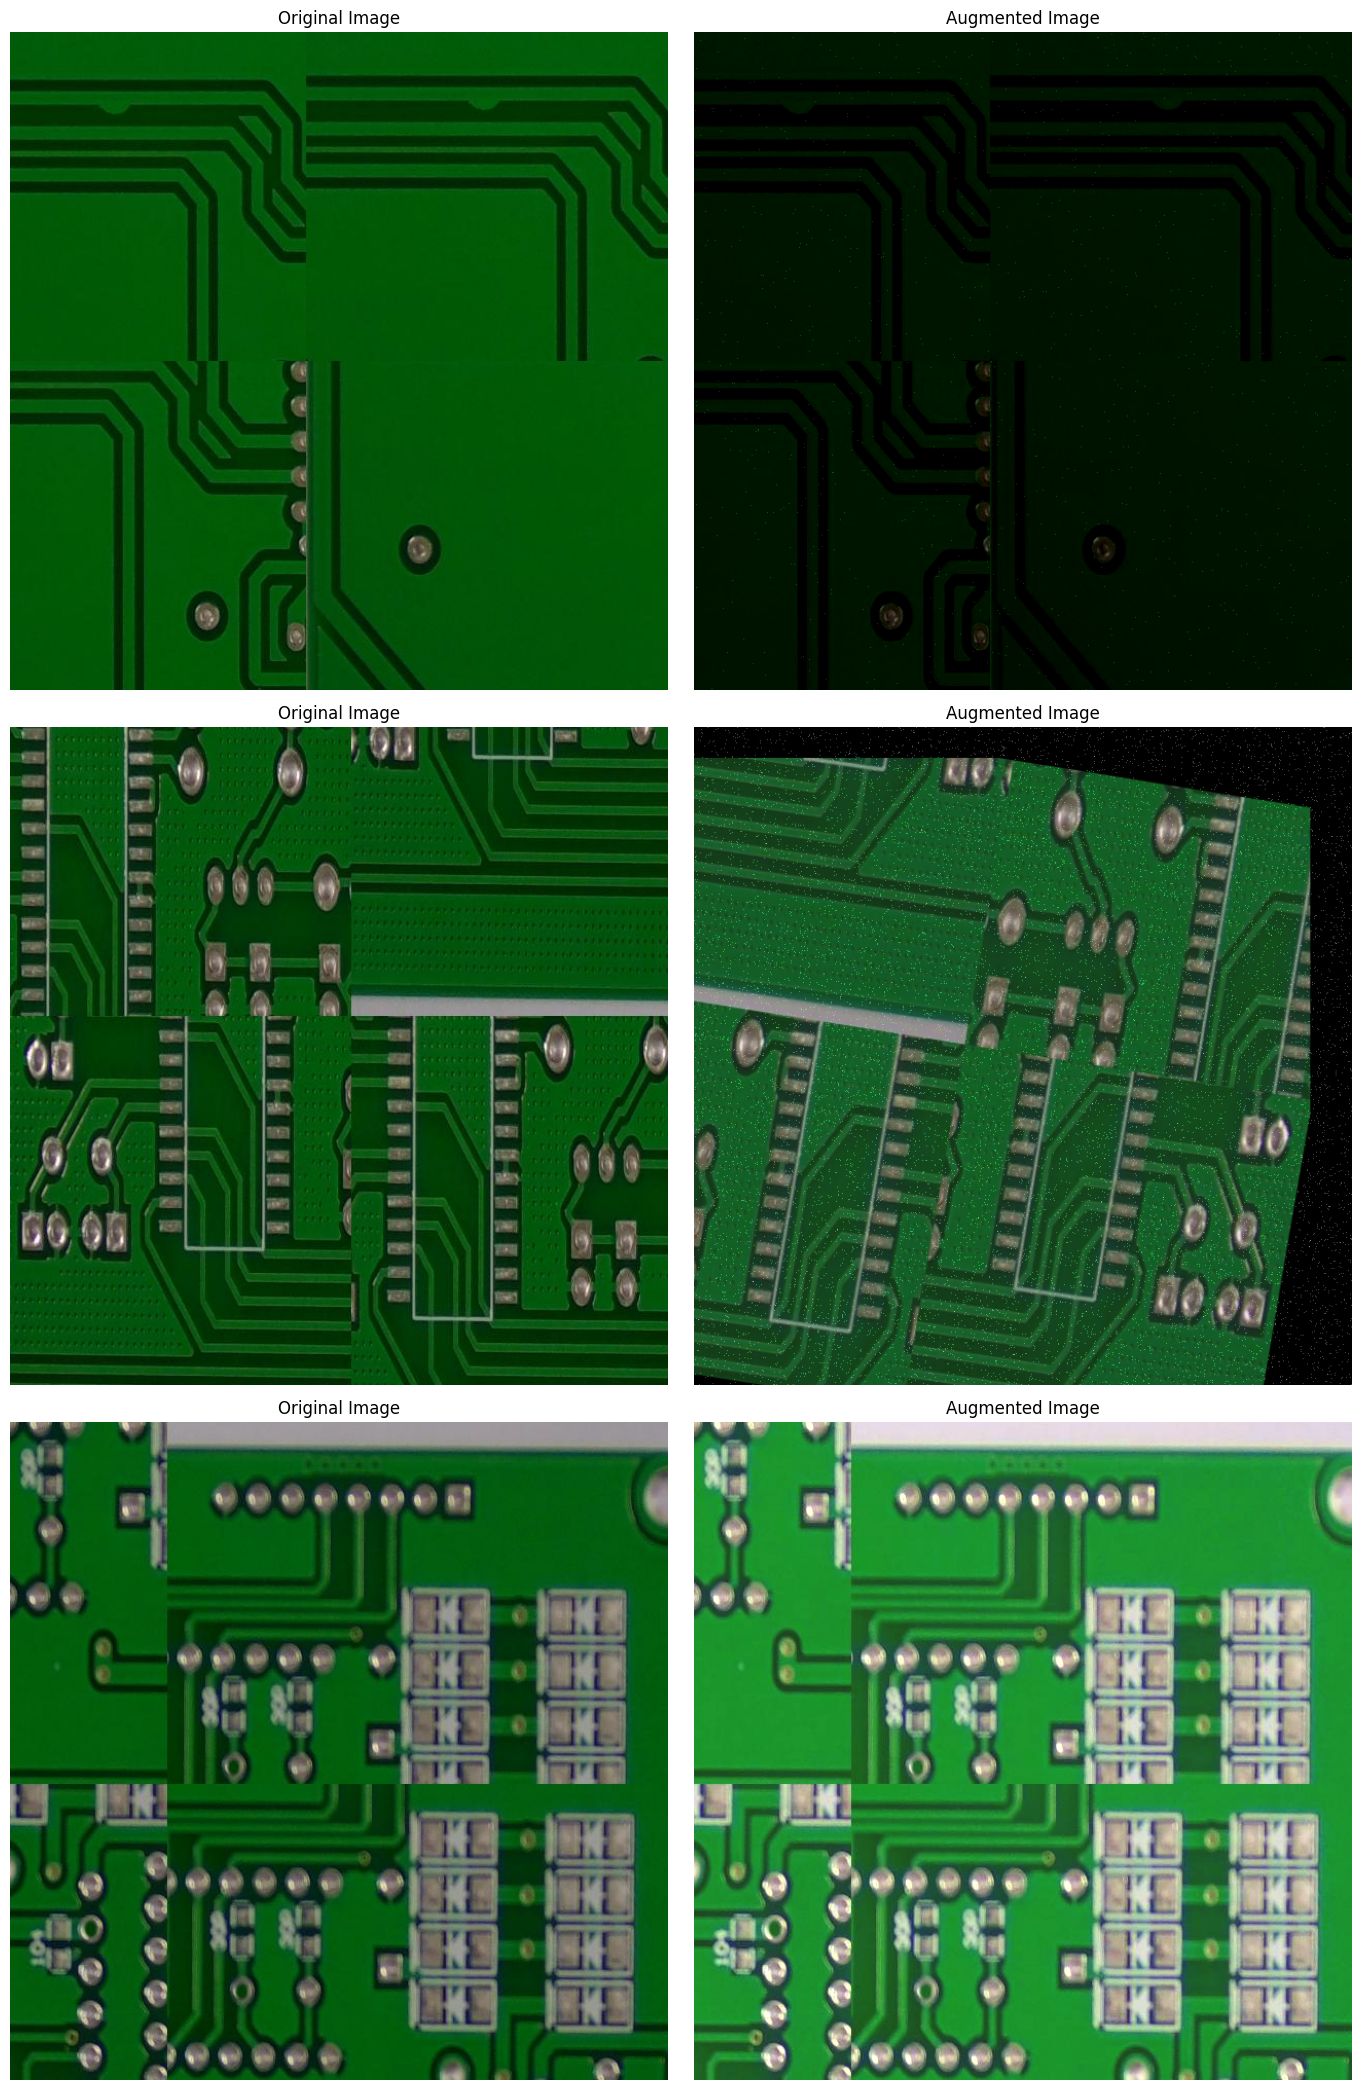

In [5]:
visualize_augment(
    image_dir=image_dir,
    pipeline=pipeline,
    n_samples=3
)